With housing prices on the rise it is important to understand the relationship between housing price, construction cost and labor cost. If a policy maker or investor is interested in predicting housing price using these values it is important to use the right method so that accurate results are produced. Otherwise decision based on incorrect data could be made resulting in policies that negatively impact the housing market or investments that could result in losses rather than profits. For this I simulated these three equations to show the endogeneity that lies within them and when using a standard method like Ordinary Least Squares(OLS) you can get results that are not representative of the true data. However using a method like 2SLS take the endogeniety into account and gives much more accurate results.

The housing price equation:
$$
\text{Housing_Price}_{it} = \beta_1 + \beta_2 \cdot \text{Sales}_{it} + \beta_3 \cdot \text{Construction_Cost}_{it} + \epsilon^H_{it}
$$
The construction cost equation:
$$
\text{Construction_Cost}_{it} = \alpha_1 + \alpha_2 \cdot \text{Material_Prices}_{it} + \alpha_3 \cdot \text{Labor_Costs}_{it} + \epsilon^C_{it}
$$
And our Labor cost equation:
$$
\text{Labor_Costs}_{it} = \gamma_1 + \gamma_2 \cdot \text{Housing_Price}_{it} + \epsilon^L_{it}
$$

The system of simultaneous population regression equations hypothesizes that housing price based on geography $i$ and time period $t$ depends on construction cost and the quantiy of homes sold in the geography and time period. Construction costs then depend on material prices and labor costs, and labor costs depends on housing price because laborers will require higher wages in geographies and times with higher housing prices. This results in housing price depending on itself in our current system of equations

$\text{Sales}_{it}$: Number of homes sold in the geography and time period

$\text{MaterialPrices}_{it}$: Cost of materials for construction in a geography and time period

$\text{LaborCost}_{it}$: Cost of Labor for workers building home

$\text{HousingPrice}_{it}$: Price of home in geography and time period

$\text{ConstructionCost}_{it}$: Cost that it took to build home

All variables are measured in logs. This means that they represent a percent of change.

Our simulated values will be:

$\beta_1$: 1
* This is the intercept for the Housing Cost equation

$\beta_2$: 0.5
*   This value means that we expect a 0.5% increase in housing price for every 1% increase in sales
* This value is very likely to be an endogenous regressor in the real world due to supply and demand but for this project we are focusing on labor costs and construction cost for the sake of simplicity

$\beta_3$: 0.5, 1, 2
* This represents a 0.5% increase in housing price in relation to a 1% increase in construction cost, 1% increase and 2% increase. We are going to test it for these three values and see which gives us the most bias since this is our endogenous variable.
* These different values represent different markets where construction cost has different impact on the price of housing

$\alpha_1$: 0
* This is the constant for the contruction cost equation. Meaning without material prices and labor cost there is no construction cost

$\alpha_2$: 1
* This represents a 1% change in material prices results in a 1% change in construction cost. We expect the price of materials to be directly related to construction cost

$\alpha_3$: .5
* This represents a 1% change in Labor Cost results in a 0.5% change in construction cost. Since Labor cost chages slower than construction cost we would expect it to have a larger impact on construction cost when it changes by 1%


$\gamma_1$: 1
* This is the intercept for the Labor cost equation

$\gamma_2$: 0.5
* This represents a 0.5% change in labor cost for every 1% change in housing price. This is in a market where housing price is changing faster than labor cost can change.

We can see that through our three equations $\text{Housing_Cost}_{it}$ ends up depending on itself through $\text{Construction_Cost}_{it}$ and $\text{Labor_Cost}_{it}$ this is the basis of our simultaneity issue and we will get bias results if we run Oridnary Least Squares(OLS) without taking this into account.

We can use subsitution to show how construction depends on housing cost
$$
\text{Construction_Cost}_{it} = \alpha_1 + \alpha_2 \cdot \text{Material_Prices}_{it} +  \alpha_3 \cdot (\gamma_1 + \gamma_2 \cdot \text{Housing_Price}_{it} + \epsilon^L_{it}) + \epsilon^C_{it}
$$

If we subsitute the orignal housing equation into this new construction equation and solve for $\text{Housing_Price}_{it}$ we get this equation to simulate the housing cost:
\begin{equation}
\text{Housing_Price}_{it} = \frac{\beta_1 + \beta_3\alpha_1 + \beta_3\alpha_3\gamma_1 + \beta_2Sales_{it}+\beta_3\alpha_2\text{Material_Prices}_{it} + \beta_3\alpha_3\epsilon^L_{it}+\epsilon^H}{1-\beta_3\alpha_3\gamma_2}
\end{equation}
and show $COV(\text{Construction_Price}_{it}, \epsilon^C_{it}) \neq 0$ which means that these equations are endogenous. The material price and sales are exogenous to the system however.




Using the new Housing price equation we can simulate data that is not bias and be able to use Oridnary Least Squares(OLS) and Two-Stage Least Squares(2SLS) to try and fit the data to a line.

In [ ]:
%reset -f
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt

OLS summary for beta_3:  0.5


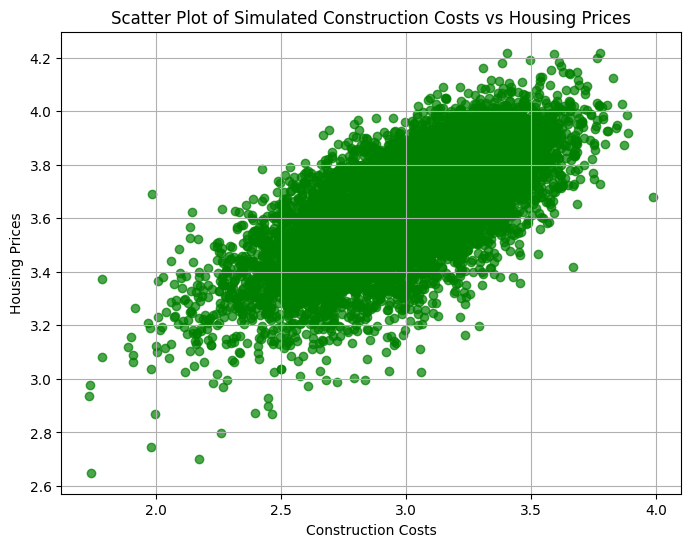

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                 1.995e+04
Date:                Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                        02:51:24   Log-Likelihood:                 10734.
No. Observations:               10000   AIC:                        -2.146e+04
Df Residuals:                    9997   BIC:                        -2.144e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3095      0.012    111.732      0.0

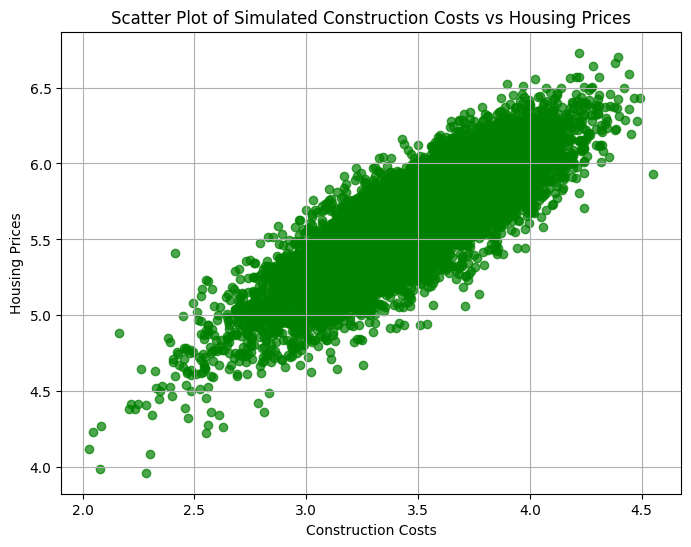

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                 2.231e+04
Date:                Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                        02:51:24   Log-Likelihood:                 5192.1
No. Observations:               10000   AIC:                        -1.038e+04
Df Residuals:                    9997   BIC:                        -1.036e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5895      0.021     76.809      0.0

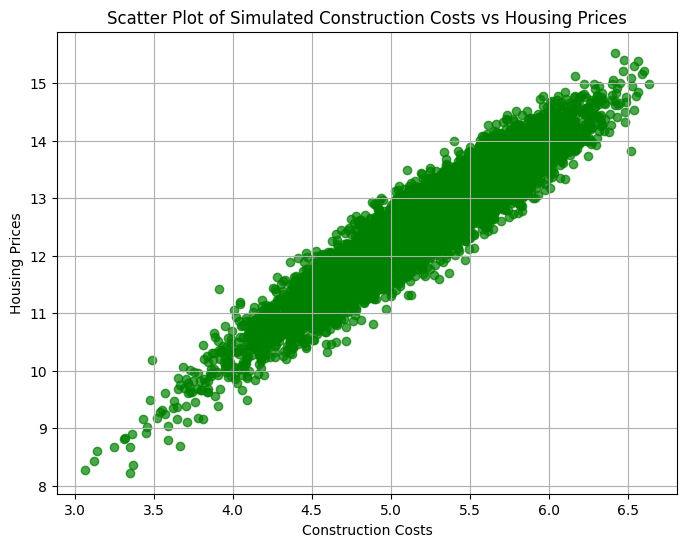

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 4.615e+04
Date:                Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                        02:51:25   Log-Likelihood:                -1773.3
No. Observations:               10000   AIC:                             3553.
Df Residuals:                    9997   BIC:                             3574.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8897      0.043     44.355      0.0

In [ ]:
np.random.seed(27)
n =10000


# Parameters
#equation 1
beta_1 = 1 # intercept of housing cost in thousands of $USD
beta_2 = .5 # increase in house price during booms
beta_3_array = [.5, 1, 2] # param of interest
#equation 2
alpha_1 = 0 # no fixed cost
alpha_2 = 1 # when material prices go up overall construction increases
alpha_3 = .5 # when labor cost goes up construction increases because labor is increasing
#equation 3
gamma_1 = 1 # intercept when the housing cost is 0 labor still has a cost
gamma_2 = .5 # labor cost doesn't increase as fast as housing cost

sales = np.random.normal(10, 2, n)  # Sales
material_prices = np.random.normal(5, 1, n)  # Material Prices
sales = np.log(sales)  # Log-transformed sales
material_prices = np.log(material_prices)  # Log-transformed material prices

# Error terms
epsilon_h = np.random.normal(0, .05, n)  # Error term for Housing Cost
epsilon_c = np.random.normal(0, .15, n)  # Error term for Construction Cost
epsilon_l = np.random.normal(0, .15, n)  # Error term for Labor Costs

# Solve for Housing Price and then Labor Cost
for beta_3 in beta_3_array:

  housing_price = (beta_1 + beta_2*sales + beta_3*alpha_1 + beta_3*alpha_2*material_prices +
                beta_3*alpha_3*gamma_1 + beta_3*alpha_3*epsilon_l + epsilon_h) / (1 - beta_3*alpha_3*gamma_2)

  labor_cost = gamma_1 + gamma_2 * housing_price + epsilon_l

  construction_cost = (alpha_1 + alpha_2 * material_prices + alpha_3 * labor_cost + epsilon_c)


# Create scatter plot for the relationship between construction costs and housing prices

  print("OLS summary for beta_3: ", beta_3)
  plt.figure(figsize=(8, 6))
  plt.scatter(construction_cost, housing_price, alpha=0.7, color="g")
  plt.title("Scatter Plot of Simulated Construction Costs vs Housing Prices")
  plt.xlabel("Construction Costs")
  plt.ylabel("Housing Prices")
  plt.grid(True)
  plt.show()

  import statsmodels.api as sm

  # Step 1: OLS Estimation to predict Housing Costs
  # We'll ignore the endogeneity and directly use sales and construction cost as predictors
  X_ols = sm.add_constant(np.column_stack([sales, construction_cost]))  # Independent variables: sales and construction costs
  ols_model = sm.OLS(housing_price, X_ols).fit()

  # Step 2: Print the OLS summary to see the results
  print(ols_model.summary())


 When we run the OLS for housing cost and ignore then endogeneity we get these values. This is a naive approach that doesn't take into account the simultaneity that exists in these equations. It calculates the housing cost model based on the variables we gave it. This results in the construction cost coeffecient being 0.3843 when it should be 0.5, 0.8111 when it should be 1, and 1.8104 when it should be 2. For all these we can also notice that the expected $\beta_3$ is not even in the 95% confidence interval. While construction cost is the variable that is endogenous we can look at the other coeffecient for sales and the constant and see that they are incorrect as well. This confirms that we have bias results from this OLS without taking into account endogeneity. We can also notice that the bias gets worse when $\beta_3$ increases. The R-squared is higher the lower $\beta_3$ is but the bias increases.

In [ ]:
import statsmodels.api as sm
for beta_3 in beta_3_array:

  housing_price = (beta_1 + beta_2*sales + beta_3*alpha_1 + beta_3*alpha_2*material_prices +
                beta_3*alpha_3*gamma_1 + beta_3*alpha_3*epsilon_l + epsilon_h) / (1 - beta_3*alpha_3*gamma_2)

  labor_cost = gamma_1 + gamma_2 * housing_price + epsilon_l

  construction_cost = (alpha_1 + alpha_2 * material_prices + alpha_3 * labor_cost + epsilon_c)


  print("OLS summary for beta_3: ", beta_3)

  # Step 1: OLS to predict construction cost without labor costs
  # Use material prices as the predictor for construction costs (ignoring labor costs)
  X_material_prices = sm.add_constant(np.column_stack([material_prices, sales]))  # Independent variable: material prices

  ols_construction_cost_model = sm.OLS(construction_cost, X_material_prices).fit()

  # Get the fitted values for construction costs
  fitted_construction_cost = ols_construction_cost_model.fittedvalues

  # Step 2: OLS to predict housing costs using the fitted construction cost from Step 1
  X_housing_cost = sm.add_constant(np.column_stack([sales, fitted_construction_cost]))  # Independent variables: sales and fitted construction cost
  two_sls_housing_cost_model = sm.OLS(housing_price, X_housing_cost).fit()

  # Step 3: Print the OLS summary for both stages
  print("OLS for Construction Costs (without labor):")
  print(ols_construction_cost_model.summary())
  print("\nOLS for Housing Costs (using fitted Construction Cost):")
  print(two_sls_housing_cost_model.summary())


OLS summary for beta_3:  0.5
OLS for Construction Costs (without labor):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     9596.
Date:                Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                        02:51:25   Log-Likelihood:                 3320.5
No. Observations:               10000   AIC:                            -6635.
Df Residuals:                    9997   BIC:                            -6613.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

This model runs OLS on construction values ommiting labor cost because that depends on housing price. This elminates the simultaneity in our equation and gets rid of the endogeneity. After we get the fitted values for our construction cost using material price and sales we put those values into the original housing price equation and run ols. We include sales because it is one of our exogenous variables and we must include those variables because they are used to predict housing price through the several equations we have. This new model eleminates the endogeniety and gives us an unbiased model. This is an example of using Instrumental Variables to eleminate endogeneity and simultaneity in our equation. The result for the construction cost coeffecient is much closer to our expected value for each of the $\beta_3$ values. The confidence interval also looks a lot better than our previous OLS result. The other coeffecients are also more accurate and their confidence intervals contain the true value. This shows that it is no longer bias and is giving us more accurate results.

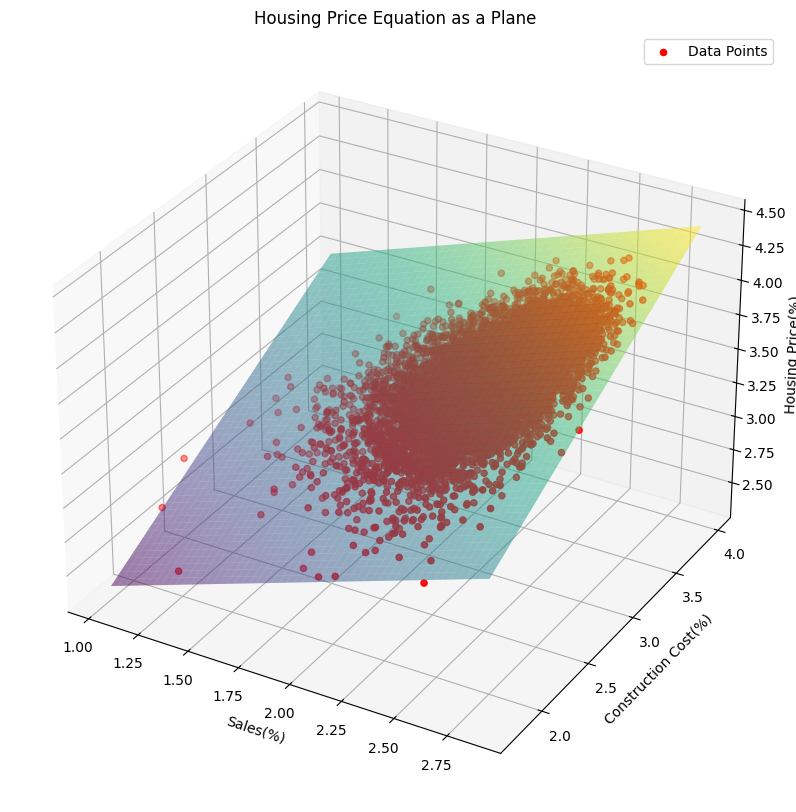

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# ... (Your existing code to calculate housing_price, labor_cost, and construction_cost) ...

# Create a grid of points for sales and construction cost
#num_points = 50  # Number of points in each dimension
num_points = 10000  # Number of points in each dimension
sales_range = np.linspace(sales.min(), sales.max(), num_points)
construction_cost_range = np.linspace(construction_cost.min(), construction_cost.max(), num_points)
sales_grid, construction_cost_grid = np.meshgrid(sales_range, construction_cost_range)

# Calculate housing price for each point on the grid using the equation
housing_price_grid = beta_1 + beta_2 * sales_grid + beta_3 * construction_cost_grid

# Create the 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the plane
ax.plot_surface(sales_grid, construction_cost_grid, housing_price_grid, alpha=0.5, cmap='viridis')

# Scatter plot of the original data points (optional)
ax.scatter(sales, construction_cost, housing_price, c='red', marker='o', s=20, label='Data Points')

ax.set_xlabel('Sales(%)')
ax.set_ylabel('Construction Cost(%)')
ax.set_zlabel('Housing Price(%)')
ax.set_title('Housing Price Equation as a Plane')
ax.legend()

plt.show()

This is a 3D representation of the Housing Price data that we simulated represented in percentages. As seen when each of these coeffecients increase so do the rest of them. They all have a positive relationship with one another.

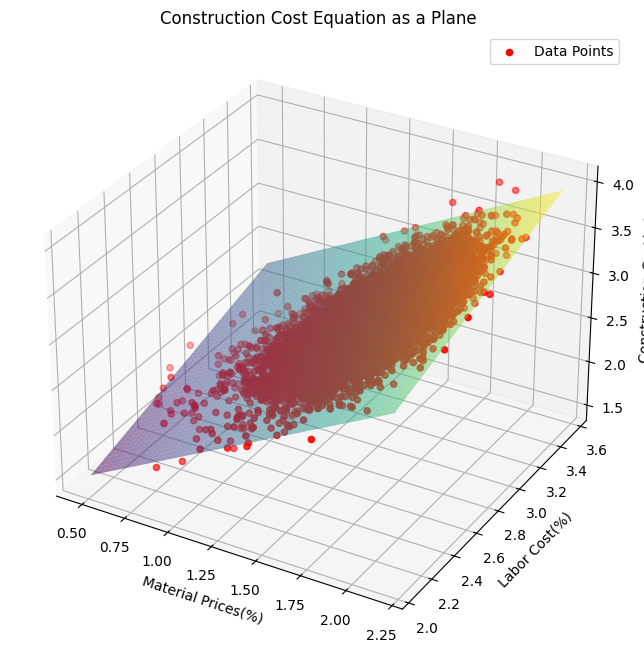

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


# Create a grid of points for material prices and labor costs
num_points = 10000  # Number of points in each dimension
material_prices_range = np.linspace(material_prices.min(), material_prices.max(), num_points)
labor_cost_range = np.linspace(labor_cost.min(), labor_cost.max(), num_points)
material_prices_grid, labor_cost_grid = np.meshgrid(material_prices_range, labor_cost_range)

# Calculate construction cost for each point on the grid using the equation
construction_cost_grid = alpha_1 + alpha_2 * material_prices_grid + alpha_3 * labor_cost_grid

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the plane
ax.plot_surface(material_prices_grid, labor_cost_grid, construction_cost_grid, alpha=0.5, cmap='viridis')

# Scatter plot of the original data points (optional)
ax.scatter(material_prices, labor_cost, construction_cost, c='red', marker='o', s=20, label='Data Points')

ax.set_xlabel('Material Prices(%)')
ax.set_ylabel('Labor Cost(%)')
ax.set_zlabel('Construction Cost(%)')
ax.set_title('Construction Cost Equation as a Plane')
ax.legend()

plt.show()

This is a 3D representation of the construction cost equation. As with the housing price equation they all have a positive relationship with each other.

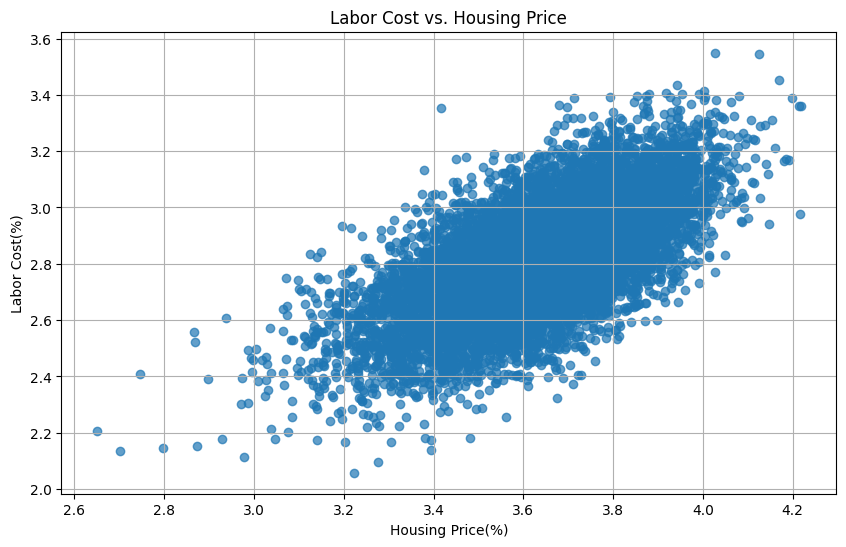

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(housing_price, labor_cost, alpha=0.7)
plt.title('Labor Cost vs. Housing Price')
plt.xlabel('Housing Price(%)')
plt.ylabel('Labor Cost(%)')
plt.grid(True)
plt.show()

This is a 2D representation fo the labor cost equation because we only have 1 coeffecient for that equation. As housing price increases so does labor cost.

In [ ]:

# Create an empty list to store the results
results = []

# Loop through each beta_3 value
for beta_3 in beta_3_array:
    # Recalculate housing_price, labor_cost, and construction_cost for the current beta_3
    housing_price = (beta_1 + beta_2 * sales + beta_3 * alpha_1 + beta_3 * alpha_2 * material_prices +
                     beta_3 * alpha_3 * gamma_1 + beta_3 * alpha_3 * epsilon_l + epsilon_h) / (1 - beta_3 * alpha_3 * gamma_2)
    labor_cost = gamma_1 + gamma_2 * housing_price + epsilon_l
    construction_cost = (alpha_1 + alpha_2 * material_prices + alpha_3 * labor_cost + epsilon_c)

    # OLS estimation
    X_ols = sm.add_constant(np.column_stack([sales, construction_cost]))
    ols_model = sm.OLS(housing_price, X_ols).fit()

    # 2SLS estimation (same as in the original code)
    X_material_prices = sm.add_constant(np.column_stack([material_prices, sales]))
    ols_construction_cost_model = sm.OLS(construction_cost, X_material_prices).fit()
    fitted_construction_cost = ols_construction_cost_model.fittedvalues
    X_housing_cost = sm.add_constant(np.column_stack([sales, fitted_construction_cost]))
    ols_housing_cost_model = sm.OLS(housing_price, X_housing_cost).fit()

    # Append results to the list
    results.append({
        'beta_3': beta_3,
        'OLS Predicted': ols_model.params[2], # Extract the coefficient of construction_cost
        '2SLS predicted': ols_housing_cost_model.params[2] # Extract the coefficient of fitted_construction_cost
    })

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame as a table
results_df

,beta_3,OLS Predicted,2SLS predicted
0,0.5,0.384199,0.505679
1,1.0,0.811098,1.007780
2,2.0,1.810430,2.009059


This is a table showing the difference in predicted $\beta_3$ using OLS and 2SLS vs the actual value that we simulated with. Seen here there is a significant difference between the OLS prediction and the true value. However the 2SLS prediction does a much better job and finding a more accurate predicted coeffecient.

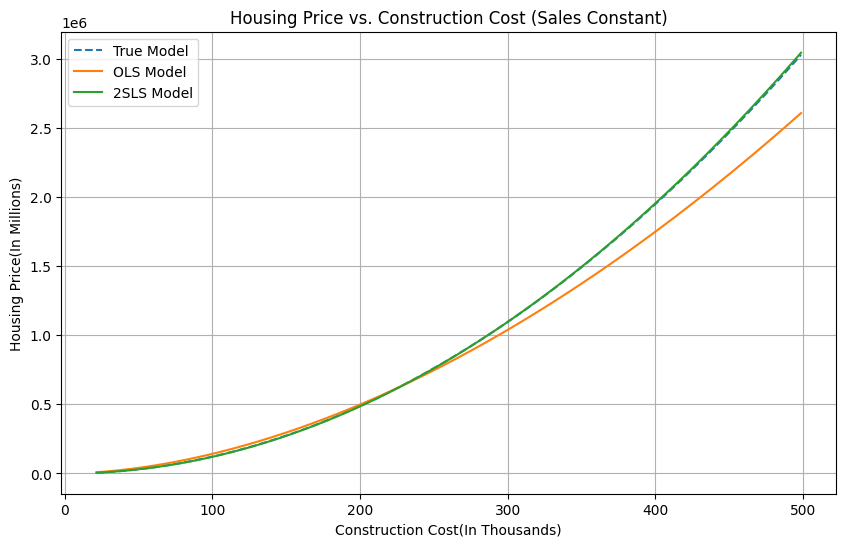

In [ ]:
# Filter the construction cost range to only include values up to 500
sales = 3
construction_cost_exp_filtered = construction_cost_exp[construction_cost_exp <= 500]
housing_price_values_filtered = housing_price_values[:len(construction_cost_exp_filtered)]
ols_housing_price_values_filtered = ols_housing_price_values[:len(construction_cost_exp_filtered)]
two_sls_housing_price_values_filtered = two_sls_housing_price_values[:len(construction_cost_exp_filtered)]

# Plot the filtered values
plt.figure(figsize=(10, 6))
plt.plot(construction_cost_exp_filtered, housing_price_values_filtered, linestyle='--', label='True Model')
plt.plot(construction_cost_exp_filtered, ols_housing_price_values_filtered, linestyle='-', label='OLS Model')
plt.plot(construction_cost_exp_filtered, two_sls_housing_price_values_filtered, linestyle='-', label='2SLS Model')
plt.title('Housing Price vs. Construction Cost (Sales Constant)')
plt.xlabel('Construction Cost(In Thousands)')
plt.ylabel('Housing Price(In Millions)')
plt.grid(True)
plt.legend()
plt.show()


Here we have  2D graph of our OLS, 2SLS and true equation with sales held constant. The values were also converted from percentages to dollar amounts to show the differnce in predictions when using actual values. This is also where $\beta_3$ is 2. As seen here the OLS line is different than the true line before and after around 225,000 and the difference only grows the high construction cost gets. This means that before and after 225,000 we are getting an incorrect prediction but in different ways. Before it is higher than it should be but after it is lower than it should be. But with the 2SLS line it is on top of the true equation. This gives us a good representation of how well the 2SLS equation does at predicting the true value with sales held constant rather than OLS.

In [ ]:
import numpy as np

# Example input values
sales_input = 3  # Sales amount
construction_cost_input = np.log(150)  # Construction cost amount (log-transformed)

# 1. True Model Prediction
housing_price_true = beta_1 + beta_2 * sales_input + beta_3_array[2] * construction_cost_input
exp_housing_price_true = np.exp(housing_price_true)  # Exponentiate back to the original scale

# 2. OLS Prediction
ols_coefficients = ols_model.params  # Extract OLS coefficients
housing_price_ols = ols_coefficients[0] + ols_coefficients[1] * sales_input + ols_coefficients[2] * construction_cost_input
exp_housing_price_ols = np.exp(housing_price_ols)  # Exponentiate back to the original scale

# 3. 2SLS Prediction
two_sls_coefficients = two_sls_housing_cost_model.params  # Extract 2SLS coefficients
housing_price_2sls = two_sls_coefficients[0] + two_sls_coefficients[1] * sales_input + two_sls_coefficients[2] * construction_cost_input
exp_housing_price_2sls = np.exp(housing_price_2sls)  # Exponentiate back to the original scale

# Exponentiated construction cost (in dollars)
exp_construction_cost = np.exp(construction_cost_input) * 1000  # Scale to match dollar interpretation

# Display the results
print(f"Exponentiated Construction Cost: ${exp_construction_cost:,.2f}")
print(f"True Model Prediction: ${exp_housing_price_true:,.2f}")
print(f"OLS Model Prediction: ${exp_housing_price_ols:,.2f}")
print(f"2SLS Model Prediction: ${exp_housing_price_2sls:,.2f}")


Exponentiated Construction Cost: $150,000.00
True Model Prediction: $274,106.11
OLS Model Prediction: $296,271.78
2SLS Model Prediction: $272,464.62


Now when we look at the prediction using a construction cost of 150,000 our OLS prediction is off by around 22,000. While our 2SLS prediction is only off by 2,000. This shows us how using the wrong prediction method that doesn't take into account the endogeneity in these equations can result in a very inaccurate prediction.

In [ ]:
import numpy as np

# Example input values
sales_input = 3  # Sales amount
construction_cost_input = np.log(200)  # Construction cost amount (log-transformed)

# 1. True Model Prediction
housing_price_true = beta_1 + beta_2 * sales_input + beta_3_array[2] * construction_cost_input
exp_housing_price_true = np.exp(housing_price_true)  # Exponentiate back to the original scale

# 2. OLS Prediction
ols_coefficients = ols_model.params  # Extract OLS coefficients
housing_price_ols = ols_coefficients[0] + ols_coefficients[1] * sales_input + ols_coefficients[2] * construction_cost_input
exp_housing_price_ols = np.exp(housing_price_ols)  # Exponentiate back to the original scale

# 3. 2SLS Prediction
two_sls_coefficients = two_sls_housing_cost_model.params  # Extract 2SLS coefficients
housing_price_2sls = two_sls_coefficients[0] + two_sls_coefficients[1] * sales_input + two_sls_coefficients[2] * construction_cost_input
exp_housing_price_2sls = np.exp(housing_price_2sls)  # Exponentiate back to the original scale

# Exponentiated construction cost (in dollars)
exp_construction_cost = np.exp(construction_cost_input) * 1000  # Scale to match dollar interpretation

# Display the results
print(f"Exponentiated Construction Cost: ${exp_construction_cost:,.2f}")
print(f"True Model Prediction: ${exp_housing_price_true:,.2f}")
print(f"OLS Model Prediction: ${exp_housing_price_ols:,.2f}")
print(f"2SLS Model Prediction: ${exp_housing_price_2sls:,.2f}")

Exponentiated Construction Cost: $200,000.00
True Model Prediction: $487,299.76
OLS Model Prediction: $498,750.21
2SLS Model Prediction: $485,645.49


With a construction cost of 200,000 the OLS prediction is a little closer only being 12,000 off but our 2SLS prediction is still a lot better only being off by around 2,000.

In [ ]:
import numpy as np

# Example input values
sales_input = 3  # Sales amount
construction_cost_input = np.log(400)  # Construction cost amount (log-transformed)

# 1. True Model Prediction
housing_price_true = beta_1 + beta_2 * sales_input + beta_3_array[2] * construction_cost_input
exp_housing_price_true = np.exp(housing_price_true)  # Exponentiate back to the original scale

# 2. OLS Prediction
ols_coefficients = ols_model.params  # Extract OLS coefficients
housing_price_ols = ols_coefficients[0] + ols_coefficients[1] * sales_input + ols_coefficients[2] * construction_cost_input
exp_housing_price_ols = np.exp(housing_price_ols)  # Exponentiate back to the original scale

# 3. 2SLS Prediction
two_sls_coefficients = two_sls_housing_cost_model.params  # Extract 2SLS coefficients
housing_price_2sls = two_sls_coefficients[0] + two_sls_coefficients[1] * sales_input + two_sls_coefficients[2] * construction_cost_input
exp_housing_price_2sls = np.exp(housing_price_2sls)  # Exponentiate back to the original scale

# Exponentiated construction cost (in dollars)
exp_construction_cost = np.exp(construction_cost_input) * 1000  # Scale to match dollar interpretation

# Display the results
print(f"Exponentiated Construction Cost: ${exp_construction_cost:,.2f}")
print(f"True Model Prediction: ${exp_housing_price_true:,.2f}")
print(f"OLS Model Prediction: ${exp_housing_price_ols:,.2f}")
print(f"2SLS Model Prediction: ${exp_housing_price_2sls:,.2f}")

Exponentiated Construction Cost: $400,000.00
True Model Prediction: $1,949,199.03
OLS Model Prediction: $1,749,350.15
2SLS Model Prediction: $1,954,817.75


As we increase the cost of construction the difference between the 2SLS prediction and the OLS prediction can be seen even more. the OLS predicts a price of 1.7 million for a construction cost of 400,000 when the true value is 1.9 million. So it is off by 200,000. However our 2SLS prediction is once again much closer only being off by around 5,000.

To conlcude, it is important to understand the relationship between housing price and construction cost so that accurate predictions can be made that accurately reflect the housing market. Otherwise the decisions that are made using a method like OLS could result in decisions that negatively impact the housing market. Using 2SLS however gives a much more accurate prediction and therefore better decisions can be made by policy makers and investors that positively impact the housing market.